In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

!pip install --upgrade certifi

!pip install --trusted-host files.pythonhosted.org optuna



In [5]:
os.listdir()

['.config', 'fraudTest.csv', 'fraudTrain.csv', 'sample_data']

In [6]:
data=pd.read_csv("fraudTrain.csv")

In [7]:
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449675,449675,2019-07-19 03:56:59,2703186189652095,fraud_Luettgen PLC,gas_transport,44.61,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,4d2a6a774936e7b56b717590f014ad9b,1.342670e+09,35.777302,-81.966163,0.0
449676,449676,2019-07-19 03:57:25,2224100459250597,fraud_Donnelly PLC,misc_net,1.81,Sheri,Thomas,F,019 Kimberly Light Apt. 039,...,30.7906,-81.5607,1293,Naval architect,1963-09-11,6b44aa396a0a34f86d526555d964a31d,1.342670e+09,29.928253,-81.019392,0.0
449677,449677,2019-07-19 03:58:10,60416207185,"fraud_Raynor, Reinger and Hagenes",gas_transport,76.23,Mary,Diaz,F,9886 Anita Drive,...,43.0048,-108.8964,1645,Information systems manager,1986-02-17,0fe3118d51eb3436960209f82c9a517d,1.342670e+09,43.281653,-108.874869,0.0
449678,449678,2019-07-19 03:58:59,4922710831011201,fraud_Morissette PLC,shopping_pos,7.14,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,8140ebb7a763fb7f14acd121d0d43d75,1.342670e+09,40.691582,-79.878473,0.0


In [8]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [9]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,449680.000000,4.496800e+05,449680.000000,449680.000000,449680.000000,449680.000000,4.496800e+05,4.496790e+05,449679.000000,449679.000000,449679.000000
mean,224839.500000,4.164363e+17,70.600625,48762.825447,38.538610,-90.208292,8.951066e+04,1.334883e+09,38.537763,-90.208584,0.006298
std,129811.578861,1.307667e+18,159.469970,26916.941313,5.073624,13.771677,3.040428e+05,4.910709e+06,5.107522,13.784015,0.079109
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.671242,0.000000
25%,112419.750000,1.800365e+14,9.670000,26041.000000,34.668900,-96.798000,7.430000e+02,1.330890e+09,34.743313,-96.880619,0.000000
50%,224839.500000,3.519607e+15,47.590000,48154.000000,39.354300,-87.458100,2.456000e+03,1.335196e+09,39.365634,-87.408106,0.000000
75%,337259.250000,4.642255e+15,83.300000,72011.000000,41.940400,-80.128400,2.047800e+04,1.339207e+09,41.956581,-80.204465,0.000000
max,449679.000000,4.992346e+18,25086.940000,99783.000000,66.693300,-67.950300,2.906700e+06,1.342670e+09,67.510267,-66.956540,1.000000


In [10]:
data.describe(include='object')

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,449680,449680,449680,449680,449680,449680,449680,449680,449680,449680,449680,449680
unique,442805,693,14,342,472,2,938,860,51,482,924,449680
top,2019-04-22 16:02:01,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,11014 Chad Lake Apt. 573,Birmingham,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9
freq,4,1514,45750,9393,10020,245891,1148,1975,32900,3375,1922,1


In [12]:
train_df = data.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num','first', 'last','trans_num', 'unix_time'],axis=1)
test_df = pd.read_csv('fraudTest.csv')

ParserError: Error tokenizing data. C error: EOF inside string starting at row 306347

In [13]:
train_df['distance']= (train_df['lat'] - train_df['merch_lat'])**2 + (train_df['long'] - train_df['merch_long'])**2

In [16]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english') and not word.isdigit()])
    return text

# Apply cleaning to relevant columns
train_df['merchant'] = train_df['merchant'].apply(clean_text)
train_df['category'] = train_df['category'].apply(clean_text)
train_df['city_state'] = train_df['city'] + '_' + train_df['state']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
train_df['city_state'] = train_df['city'] + '_' + train_df['state']

In [18]:
from datetime import datetime

# Function to calculate age
def calculate_age(dob):
    today = datetime.today()
    dob = datetime.strptime(dob, '%Y-%m-%d')
    age = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
    return age

# Apply the function to the 'dob' column
train_df['age'] = train_df['dob'].apply(calculate_age)


In [19]:
categorical_columns = ['category', 'gender', 'job','city','state','merchant','street','city_state']
for column in categorical_columns:
    train_df[column] = train_df[column].astype('category')

In [20]:
train_df

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,distance,city_state,age
0,fraud_rippin kub mann,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0.0,0.761831,Moravian Falls_NC,36
1,fraud_heller gutmann zieme,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0.0,0.074153,Orient_WA,46
2,fraud_lindbuckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0.0,0.952274,Malad City_ID,62
3,fraud_kutch hermiston farrell,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0.0,0.846035,Boulder_MT,57
4,fraud_keelingcrist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0.0,0.754300,Doe Hill_VA,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449675,fraud_luettgen plc,gas_transport,44.61,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,35.777302,-81.966163,0.0,0.711944,Moravian Falls_NC,36
449676,fraud_donnelly plc,misc_net,1.81,F,019 Kimberly Light Apt. 039,Kings Bay,GA,31547,30.7906,-81.5607,1293,Naval architect,1963-09-11,29.928253,-81.019392,0.0,1.036657,Kings Bay_GA,61
449677,fraud_raynor reinger hagenes,gas_transport,76.23,F,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,43.281653,-108.874869,0.0,0.077111,Fort Washakie_WY,38
449678,fraud_morissette plc,shopping_pos,7.14,F,6888 Hicks Stream Suite 954,Manor,PA,15665,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,40.691582,-79.878473,0.0,0.173935,Manor_PA,83


In [21]:
train_df.dtypes

,0
merchant,category
category,category
amt,float64
gender,category
street,category
city,category
state,category
zip,int64
lat,float64
long,float64


In [22]:
import networkx as nx

G = nx.Graph()

# Add nodes and edges based on the data
for index, row in data.iterrows():
    trans_id = f'trans_{index}'
    G.add_node(trans_id, label='transaction')
    G.add_node(row['merchant'], label='merchant')
    G.add_node(row['category'], label='category')
    G.add_node(row['city'], label='city')
    G.add_node(row['state'], label='state')
    G.add_edge(trans_id, row['merchant'], relationship='made_at')
    G.add_edge(trans_id, row['category'], relationship='belongs_to')
    G.add_edge(trans_id, row['city'], relationship='located_in')
    G.add_edge(trans_id, row['state'], relationship='in')
    G.add_node(row['job'], label='job')
    G.add_edge(trans_id, row['job'], relationship='job')

In [23]:
train_df.drop(['merch_lat', 'merch_long','lat', 'long'],axis=1,inplace=True)

In [24]:
train_df.columns

Index(['merchant', 'category', 'amt', 'gender', 'street', 'city', 'state',
       'zip', 'city_pop', 'job', 'dob', 'is_fraud', 'distance', 'city_state',
       'age'],
      dtype='object')

In [25]:
train_df.drop(['street','zip','city_pop'],axis=1,inplace=True)

In [26]:
train_df.drop(['dob'],axis=1,inplace=True)

In [27]:
train_df.to_csv("train_df_new.csv")

In [28]:
train_df=pd.read_csv("train_df_new.csv")
train_df.drop('Unnamed: 0',axis=1,inplace=True)

In [30]:
!pip install pykeen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.4/718.4 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.0 MB/s eta 0:00:00


In [ ]:
from pykeen.pipeline import pipeline
from pykeen.triples import TriplesFactory
from sklearn.model_selection import train_test_split
# Create triples for KG (subject, predicate, object)
triples = []
for index, row in train_df.iterrows():
    trans_id = f'trans_{index}'
    triples.append((trans_id, 'made_at', row['merchant']))
    triples.append((trans_id, 'belongs_to', row['category']))
    triples.append((trans_id, 'located_in', row['city']))
    triples.append((trans_id, 'in', row['state']))
    triples.append((trans_id, 'job', row['job']))
triples = np.array(triples)
# Create a PyKEEN dataset
for i in range(25):
    print(triples[i])

# Check data types of the triples
print(type(triples[0][0]), type(triples[0][1]), type(triples[0][2]))

# Remove malformed entries
valid_triples = [triple for triple in triples if len(triple) == 3]
triples = np.array(valid_triples)

# Split the triples into training and testing sets
train_triples, test_triples = train_test_split(triples, test_size=0.2, random_state=42)

# Create TriplesFactory objects for training and testing sets
train_tf = TriplesFactory.from_labeled_triples(train_triples)
test_tf = TriplesFactory.from_labeled_triples(test_triples)

# Print TriplesFactory details for debugging
print(train_tf)
print(test_tf)

# Train a KG embedding model with both training and testing triples factories
result = pipeline(
    training=train_tf,
    testing=test_tf,
    model='TransE',
    training_kwargs=dict(num_epochs=10),
)

# Get embeddings
embeddings = result.model.entity_representations[0].detach().numpy()

# Create a DataFrame with embeddings
embedding_df = pd.DataFrame(embeddings, index=tf.entity_to_id.keys())

# Merge embeddings with labels
train_df['embedding'] = train_df.index.map(lambda x: embedding_df.loc[f'trans_{x}'].values)

INFO:pykeen.utils:Using opt_einsum


['trans_0' 'made_at' 'fraud_rippin kub mann']
['trans_0' 'belongs_to' 'misc_net']
['trans_0' 'located_in' 'Moravian Falls']
['trans_0' 'in' 'NC']
['trans_0' 'job' 'Psychologist, counselling']
['trans_1' 'made_at' 'fraud_heller gutmann zieme']
['trans_1' 'belongs_to' 'grocery_pos']
['trans_1' 'located_in' 'Orient']
['trans_1' 'in' 'WA']
['trans_1' 'job' 'Special educational needs teacher']
['trans_2' 'made_at' 'fraud_lindbuckridge']
['trans_2' 'belongs_to' 'entertainment']
['trans_2' 'located_in' 'Malad City']
['trans_2' 'in' 'ID']
['trans_2' 'job' 'Nature conservation officer']
['trans_3' 'made_at' 'fraud_kutch hermiston farrell']
['trans_3' 'belongs_to' 'gas_transport']
['trans_3' 'located_in' 'Boulder']
['trans_3' 'in' 'MT']
['trans_3' 'job' 'Patent attorney']
['trans_4' 'made_at' 'fraud_keelingcrist']
['trans_4' 'belongs_to' 'misc_pos']
['trans_4' 'located_in' 'Doe Hill']
['trans_4' 'in' 'VA']
['trans_4' 'job' 'Dance movement psychotherapist']
<class 'numpy.str_'> <class 'numpy.str_

INFO:pykeen.pipeline.api:Using device: None


TriplesFactory(num_entities=451626, num_relations=5, create_inverse_triples=False, num_triples=1798720)
TriplesFactory(num_entities=304595, num_relations=5, create_inverse_triples=False, num_triples=449680)


Training epochs on cpu:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/7027 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7027 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/7027 [00:00<?, ?batch/s]

In [ ]:
# Convert all object columns to category
train_df = train_df.apply(lambda col: col.astype('category') if col.dtype == 'object' else col)


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

X = np.vstack(train_df['embedding'].values)
additional_features = train_df[['amt', 'distance', 'age','gender']].values
X = np.hstack((X, additional_features))
y = data['is_fraud']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.81      0.65      0.72      1520

    accuracy                           1.00    259335
   macro avg       0.90      0.83      0.86    259335
weighted avg       1.00      1.00      1.00    259335

confusion_matrix 
 [[257582    233]
 [   530    990]]


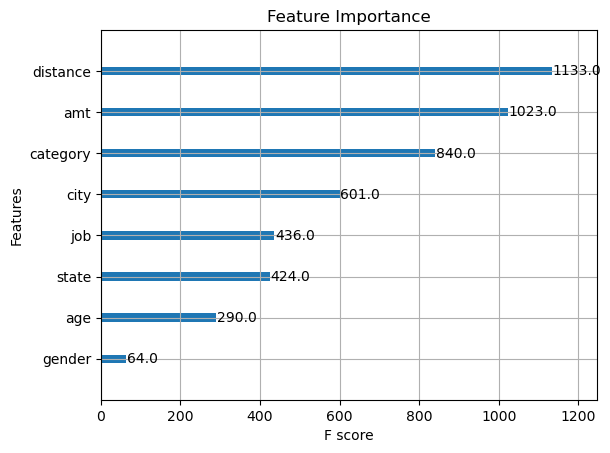

In [ ]:
#scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(random_state=42,enable_categorical=True)#,scale_pos_weight=scale_pos_weight)
model.fit(X_train, y_train)


y_val_pred = model.predict(X_val)


print(f"classification report \n {classification_report(y_val, y_val_pred)}")
print(f"confusion_matrix \n {confusion_matrix(y_val, y_val_pred)}")

xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()


In [ ]:
 y_train.value_counts()

is_fraud
0    1031354
1       5986
Name: count, dtype: int64

[0]	validation_0-auc:0.97365
[1]	validation_0-auc:0.97962
[2]	validation_0-auc:0.98000
[3]	validation_0-auc:0.98307
[4]	validation_0-auc:0.98576
[5]	validation_0-auc:0.98815
[6]	validation_0-auc:0.98819
[7]	validation_0-auc:0.98702
[8]	validation_0-auc:0.98755
[9]	validation_0-auc:0.98708
[10]	validation_0-auc:0.98710
classification report 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    257815
           1       0.16      0.92      0.27      1520

    accuracy                           0.97    259335
   macro avg       0.58      0.95      0.63    259335
weighted avg       0.99      0.97      0.98    259335

confusion_matrix 
 [[250407   7408]
 [   123   1397]]


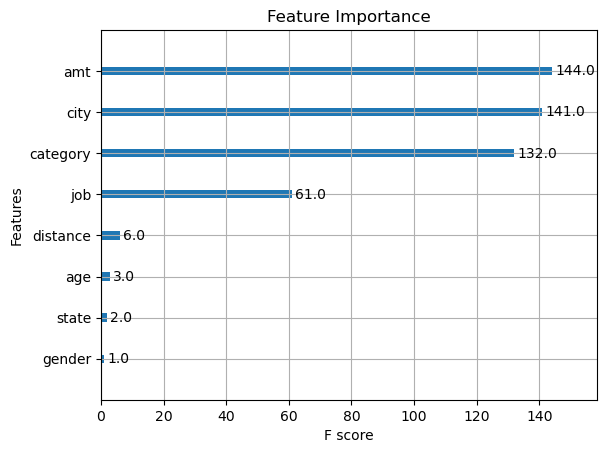

In [ ]:
scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1])

model = xgb.XGBClassifier(early_stopping_rounds =5 ,eval_metric='auc', random_state=42,enable_categorical=True,scale_pos_weight=scale_pos_weight)
model.fit(X_train, y_train,eval_set=[(X_val, y_val)])

y_val_pred = model.predict(X_val)


print(f"classification report \n {classification_report(y_val, y_val_pred)}")
print(f"confusion_matrix \n {confusion_matrix(y_val, y_val_pred)}")

xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()


##### Use stacking

In [ ]:
import lightgbm as lgbm
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('lgbm',lgbm.LGBMClassifier(random_state=42)),
    ('xgb', xgb.XGBClassifier(random_state=42, enable_categorical=True))
]


In [ ]:
meta_learner = LogisticRegression()

stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

stacking_model.fit(X_train, y_train)


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 5986, number of negative: 1031354
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1918
[LightGBM] [Info] Number of data points in the train set: 1037340, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005771 -> initscore=-5.149204
[LightGBM] [Info] Start training from score -5.149204
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large 

StackingClassifier(estimators=[('lgbm', LGBMClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=True,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

In [ ]:
#model = xgb.XGBClassifier(early_stopping_rounds=10, eval_metric='auc',enable_categorical=True)
#model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)

# Make predictions on the validation set
y_val_pred = stacking_model.predict(X_val)

print(f"classification report \n {classification_report(y_val, y_val_pred)}")
print(f"confusion_matrix \n {confusion_matrix(y_val, y_val_pred)}")


classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.85      0.61      0.71      1520

    accuracy                           1.00    259335
   macro avg       0.92      0.81      0.85    259335
weighted avg       1.00      1.00      1.00    259335

confusion_matrix 
 [[257650    165]
 [   591    929]]
